In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [160]:
df_beers = pd.read_csv('beers.csv')
df_beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [161]:
df_breweries = pd.read_csv('breweries.csv')
df_breweries.head()

,brewery id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Let's calculate the number of beers, breweries, and beer styles, respectively, in our dataset:

In [162]:
print(df_beers["name"].count())
print(df_breweries["name"].count())
print(df_beers["style"].nunique())

2410
558
99


We are given two separate dataset files - one with all the beers and their attributes and one with the breweries and their locations. In order to merge them, we have to use the Pandas merge tool to combine both datasets. Luckily, they are linked with a common identifier: the brewery id.

In [163]:
df_data = pd.merge(left=df_beers, right=df_breweries, left_on="brewery_id", right_on="brewery id", how="left")
df_data.head()

,Unnamed: 0,abv,ibu,id,name_x,style,brewery_id,ounces,brewery id,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN


We have a total of 2410 beers in our dataset. Each beer has its style, abv content, and brewery listed. This dataset was found on Kaggle and originally comes from CraftCans.com. This dataset is interesting because there has been a craft beer boom in the past decade with many craft breweries opening up and brewing all kinds of different beer styles. Given the information that we have, three questions that we should ask are:
What style is the most brewed and what state brews the most of it? If we were to pick up a random beer off the shelf, what abv % would it be? 
Are we able to tell what style a beer is based on its abv content?

In [164]:
stylequantity = df_data["style"].value_counts()
stylequantity.head()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: style, dtype: int64

American IPAs are the most popular of the bunch and brewed the most.

In [165]:
df = pd.DataFrame(df_data)
df_AmericanIPA = df["state"][df["style"]=="American IPA"].value_counts()
df_AmericanIPA.head()

 CA    45
 CO    40
 IN    26
 OR    24
 WA    21
Name: state, dtype: int64

We get the answer to our first question. American IPA is the most commonly brewed style. California brews the most amount of American IPAs.

In [166]:
df_breweries["state"].value_counts()
Breweries_per_state = df_breweries["state"].value_counts()
Breweries_per_state.head()

 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
Name: state, dtype: int64

0.05977342419080093
0.013541733716680252


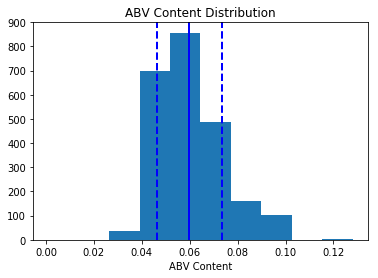

In [167]:
print(df_data["abv"].mean())
print(df_data["abv"].std())

plt.hist(df_data["abv"])
plt.axvline(df_data["abv"].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df_data["abv"].mean() + df_data["abv"].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df_data["abv"].mean() - df_data["abv"].std(), color='b', linestyle='dashed', linewidth=2)
plt.title('ABV Content Distribution')
plt.xlabel('ABV Content')
plt.show()

The average abv content per beer in our dataset is 5.98%. Since our standard deviation is pretty low (1.35%), we can say that if we grab a random beer off the shelf, it will be around 5.98% plus or minus 1.35% 1-sigma. We are __ confident that the beer has an abv value within that range. That is the answer to our second question.

Let's take a look at what the average abv content is per beer style.

In [168]:
df_ABVperStyle = df_data.groupby(['style']).mean()["abv"]
df_ABVperStyle.head()

style
Abbey Single Ale              0.049000
Altbier                       0.054385
American Adjunct Lager        0.048722
American Amber / Red Ale      0.057456
American Amber / Red Lager    0.049464
Name: abv, dtype: float64

To answer our third question (Are we able to tell what style a beer is based on its abv content?), we need to consider the abv content per style and compare it to the rest of the styles. We can create a table that shows the average abv content per style. To save space, we'll look at the 12 most popular styles. For now, we'll look at one of the styles - Fruit/Vegetable Beer.

In [177]:
styledata = {'average abv':df_ABVperStyle, 'quantity':stylequantity}
df_style = pd.DataFrame(styledata)

df_topdozenstyles = df_style.sort_values(by=['quantity'])[-12:]
df_topdozenstyles.sort_values(by="average abv")

,average abv,quantity
American Pale Wheat Ale,0.048411,97
Kölsch,0.048952,42
American Blonde Ale,0.049635,108
Fruit / Vegetable Beer,0.052469,49
Witbier,0.053551,51
American Pale Ale (APA),0.054577,245
American Amber / Red Ale,0.057456,133
American Brown Ale,0.057926,70
American Porter,0.059600,68
Saison / Farmhouse Ale,0.061442,52


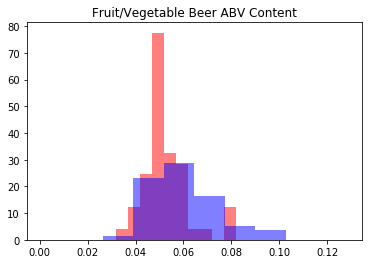

In [183]:
df_fruitandvegetable = pd.DataFrame(df_data)
df_fruitandvegetable = df_data["abv"][df["style"]=="Fruit / Vegetable Beer"]
df_allothers = df_data["abv"][df["style"]!="Fruit / Vegetable Beer"]
plt.hist(df_fruitandvegetable, density=True, color='red', alpha=0.5, label="Fruit/Vegetable Beer")
plt.hist(df_allothers, density=True, color='blue', alpha=0.5, label="All Other Styles")
plt.title("Fruit/Vegetable Beer ABV Content")
plt.show()

Based on this visualization, we would consider abv content where there is more red than blue to potentially be a fruit/vegetable beer. We could do the same as above on the rest of the styles to identify what style a beer would be. ABV content on its own could not tell us what style a beer is. We would have to take other variables into consideration (e.g IBU). Another way to help figure out the style of the beer is using Natural Language Processing on the name of the beer and its brewery.